# Distributions 11/15/22

* Goal 11/15/22: look at distributions of the data ...



In [17]:
import json
import datetime
import pandas as pd
import numpy as np
import sys
import os

import plotly.express as px
import plotly.graph_objects as go


import seaborn as sns
import seaborn.objects as so
# Apply the default theme
sns.set_theme()
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv("../constants/td_ambient_102022.csv", )
df["DateTime"] = pd.to_datetime(df["DateTime"])
df

,DateTime,Temp C,RH %,Room,Ambient Temp,Ambient RH,Window Open
0,2022-07-20 07:20:00,23.189,51.268,0,14.333333,30.555556,1
1,2022-07-20 07:20:30,23.189,51.362,0,14.333333,30.555556,1
2,2022-07-20 07:21:00,23.189,51.488,0,14.333333,30.555556,1
3,2022-07-20 07:21:30,23.189,51.457,0,14.333333,30.555556,1
4,2022-07-20 07:22:00,23.165,51.517,0,14.333333,30.555556,1
...,...,...,...,...,...,...,...
123601,2022-09-11 07:58:00,29.196,50.861,1,19.611111,30.000000,0
123602,2022-09-11 07:58:30,29.196,50.861,1,19.611111,30.000000,0
123603,2022-09-11 07:59:00,29.196,50.796,1,19.611111,30.000000,0
123604,2022-09-11 07:59:30,29.196,50.796,1,19.611111,30.000000,0


In [19]:
# add temperature and rh deltas for each observation 
df["T_Delta"] =  df["Temp C"] - df["Ambient Temp"]
df["RH_Delta"] =  df["RH %"]- df["Ambient RH"]


In [20]:
df.head()

,DateTime,Temp C,RH %,Room,Ambient Temp,Ambient RH,Window Open,T_Delta,RH_Delta
0,2022-07-20 07:20:00,23.189,51.268,0,14.333333,30.555556,1,8.855667,20.712444
1,2022-07-20 07:20:30,23.189,51.362,0,14.333333,30.555556,1,8.855667,20.806444
2,2022-07-20 07:21:00,23.189,51.488,0,14.333333,30.555556,1,8.855667,20.932444
3,2022-07-20 07:21:30,23.189,51.457,0,14.333333,30.555556,1,8.855667,20.901444
4,2022-07-20 07:22:00,23.165,51.517,0,14.333333,30.555556,1,8.831667,20.961444


In [21]:
df["Temp C"]

0         23.189
1         23.189
2         23.189
3         23.189
4         23.165
           ...  
123601    29.196
123602    29.196
123603    29.196
123604    29.196
123605    29.196
Name: Temp C, Length: 123606, dtype: float64

# Grouping and Statistics 

In [22]:
# do some grouping 

# group by window open vs window closed -> where are the deltas greater 
df.drop("DateTime", axis=1).groupby(["Window Open"]).agg(["mean", "std"]).loc[:,["T_Delta", "RH_Delta"]]

T_Delta             RH_Delta          
                 mean       std       mean       std
Window Open                                         
0            5.752171  4.206669  30.640394  8.547424
1            6.257008  3.594757  28.279236  7.846737

In [23]:
# group by rooms -> where are the deltas greater 
df.drop("DateTime", axis=1).groupby(["Room"]).agg(["mean", "std"]).loc[:,["T_Delta", "RH_Delta"]]

T_Delta             RH_Delta          
          mean       std       mean       std
Room                                         
0     5.729435  3.780207  29.178837  8.143704
1     6.301897  4.010265  29.637181  8.395411

In [24]:
# group by window open vs window closed and rooms -> where are the deltas greater 
df.drop("DateTime", axis=1).groupby(["Window Open", "Room"]).agg(["mean", "std"]).loc[:,["T_Delta", "RH_Delta"]]

T_Delta             RH_Delta          
                      mean       std       mean       std
Window Open Room                                         
0           0     1.603624  4.786734  37.193811  7.443892
            1     6.059046  3.992906  30.155626  8.423356
1           0     6.020292  3.521054  28.613806  7.889349
            1     8.272099  3.584829  25.431145  6.841461

# Plot Distributions

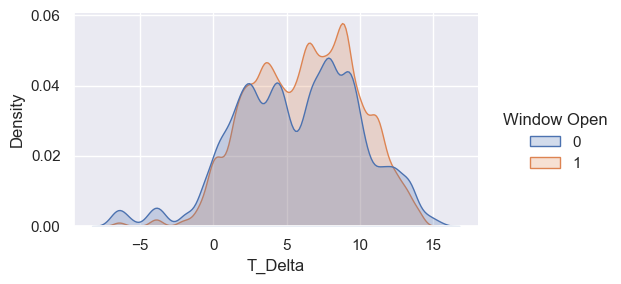

In [25]:
sns.displot(df, x="T_Delta", hue="Window Open", kind="kde", height=3, aspect=1.7,  fill=True)

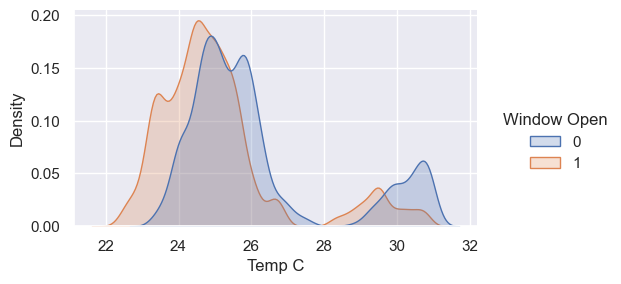

In [13]:
sns.displot(df, x="Temp C", hue="Window Open", kind="kde", height=3, aspect=1.7,  fill=True)

ValueError: Could not interpret value `T_Delta` for parameter `x`